In [1]:
import pandas as pd

In [3]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is 4836-71B9

 Directory of C:\Users\rahulgup\Downloads\Kaggle_codes

04/30/2020  07:29 PM    <DIR>          .
04/30/2020  07:29 PM    <DIR>          ..
04/30/2020  07:29 PM    <DIR>          .ipynb_checkpoints
04/30/2020  03:18 PM           216,309 covid19-global-forecasting-week-2.zip
04/30/2020  07:28 PM           115,351 submission.csv
04/30/2020  07:28 PM           365,792 test.csv
04/30/2020  07:28 PM           783,368 train.csv
04/30/2020  07:29 PM                72 Untitled.ipynb
               5 File(s)      1,480,892 bytes
               3 Dir(s)  138,435,411,968 bytes free


In [89]:
train = pd.read_csv("train.csv", keep_default_na=False)

In [9]:
test = pd.read_csv("test.csv", keep_default_na=False)

In [10]:
submission = pd.read_csv("submission.csv", keep_default_na=False)

In [16]:
print(
    train.shape, test.shape, submission.shape
)

((20580, 6), (12642, 4), (12642, 3))


In [90]:
train.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [14]:
train.head(10)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,,Afghanistan,2020-01-22,0.0,0.0
1,2,,Afghanistan,2020-01-23,0.0,0.0
2,3,,Afghanistan,2020-01-24,0.0,0.0
3,4,,Afghanistan,2020-01-25,0.0,0.0
4,5,,Afghanistan,2020-01-26,0.0,0.0
5,6,,Afghanistan,2020-01-27,0.0,0.0
6,7,,Afghanistan,2020-01-28,0.0,0.0
7,8,,Afghanistan,2020-01-29,0.0,0.0
8,9,,Afghanistan,2020-01-30,0.0,0.0
9,10,,Afghanistan,2020-01-31,0.0,0.0


In [13]:
test.head(10)

,ForecastId,Province_State,Country_Region,Date
0,1,,Afghanistan,2020-03-19
1,2,,Afghanistan,2020-03-20
2,3,,Afghanistan,2020-03-21
3,4,,Afghanistan,2020-03-22
4,5,,Afghanistan,2020-03-23
5,6,,Afghanistan,2020-03-24
6,7,,Afghanistan,2020-03-25
7,8,,Afghanistan,2020-03-26
8,9,,Afghanistan,2020-03-27
9,10,,Afghanistan,2020-03-28


In [15]:
submission.head(10)

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1
5,6,1,1
6,7,1,1
7,8,1,1
8,9,1,1
9,10,1,1


### K-Means clustering method considers two assumptions regarding the clusters – first that the clusters are spherical and second that the clusters are of similar size.
- Spherical assumption helps in separating the clusters when the algorithm works on the data and forms clusters. If this assumption is violated, the clusters formed may not be what one expects.
- On the other hand, assumption over the size of clusters helps in deciding the boundaries of the cluster. This assumption helps in calculating the number of data points each cluster should have.
- This assumption also gives an advantage. Clusters in K-means are defined by taking the mean of all the data points in the cluster. With this assumption, one can start with the centers of clusters anywhere.
- Keeping the starting points of the clusters anywhere will still make the algorithm converge with the same final clusters as keeping the centers as far apart as possible.

In [27]:
train.shape, len(train.Id.unique())

((20580, 6), 20580)

In [28]:
train.shape, len(train.Province_State.unique())

((20580, 6), 126)

In [29]:
train.shape, len(train.Country_Region.unique())

((20580, 6), 173)

In [30]:
train.shape, len(train.Date.unique())

((20580, 6), 70)

In [31]:
train.shape, len(train.ConfirmedCases.unique())

((20580, 6), 1536)

In [32]:
train.shape, len(train.Fatalities.unique())

((20580, 6), 328)

In [40]:
train.describe()

,Id,ConfirmedCases,Fatalities
count,20580.000000,20580.000000,20580.000000
mean,14685.500000,514.939116,21.080952
std,8487.230117,4541.261768,287.758197
min,1.000000,0.000000,0.000000
25%,7335.750000,0.000000,0.000000
50%,14685.500000,0.000000,0.000000
75%,22035.250000,35.000000,0.000000
max,29370.000000,105792.000000,12428.000000


In [63]:
df = train.groupby(train.Province_State).nunique()
df[df.Province_State > 1]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Province_State,,,,,,


In [91]:
df = train.groupby(train.Country_Region).nunique()
df[df.Province_State > 1]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Country_Region,,,,,,
Australia,560,8,1,70,112,9
Canada,700,10,1,70,120,20
China,2310,33,1,70,657,83
Denmark,210,3,1,70,51,17
France,700,10,1,70,87,27
Netherlands,280,4,1,70,47,24
US,3780,54,1,70,540,108
United Kingdom,490,7,1,70,67,23


In [102]:
df[df.Province_State > 1].index

Index([u'Australia', u'Canada', u'China', u'Denmark', u'France',
       u'Netherlands', u'US', u'United Kingdom'],
      dtype='object', name=u'Country_Region')

In [107]:
# train[train.Country_Region == "US"][train.Province_State == ""]
for i in df[df.Province_State > 1].index:
    z = [x for x in train[train.Country_Region == i].Province_State.unique() if x == ""]
    k = []
    if z:
        k = train[train.Country_Region == i].Province_State.unique()
    print(i, z, k)

('Australia', [], [])
('Canada', [], [])
('China', [], [])
('Denmark', [''], array(['Faroe Islands', 'Greenland', ''], dtype=object))
('France', [''], array(['French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'St Martin', ''], dtype=object))
('Netherlands', [''], array(['Aruba', 'Curacao', 'Sint Maarten', ''], dtype=object))
('US', [], [])
('United Kingdom', [''], array(['Bermuda', 'Cayman Islands', 'Channel Islands', 'Gibraltar',
       'Isle of Man', 'Montserrat', ''], dtype=object))


In [93]:
# df["US" in df.Country_Region]#.Province_State.unique()

In [69]:
df = train.groupby([train.Province_State, train.Country_Region]).nunique()
# df = train.groupby(train.Country_Region).nunique()
df[df.Province_State == 1]

,,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Province_State,Country_Region,,,,,,


In [108]:
train['Province_State'] = train.apply(
    lambda row: row['Country_Region'] if row['Province_State'] == "" else row['Province_State'],
    axis=1
)

In [109]:
# train.groupby([train.Province_State, train.Country_Region]).nunique()

In [110]:
len(train.Province_State.unique()), len(train.Country_Region.unique())

(293, 173)

In [64]:
train.Date.unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [115]:
[x for x in train.Fatalities.unique() if x == float("NaN")]

[]

In [116]:
[x for x in train.ConfirmedCases.unique() if x == float("NaN")]

[]

In [144]:
train[train.Country_Region == "India"]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
9380,13401,India,India,2020-01-22,0.0,0.0
9381,13402,India,India,2020-01-23,0.0,0.0
9382,13403,India,India,2020-01-24,0.0,0.0
9383,13404,India,India,2020-01-25,0.0,0.0
9384,13405,India,India,2020-01-26,0.0,0.0
9385,13406,India,India,2020-01-27,0.0,0.0
9386,13407,India,India,2020-01-28,0.0,0.0
9387,13408,India,India,2020-01-29,0.0,0.0
9388,13409,India,India,2020-01-30,1.0,0.0
9389,13410,India,India,2020-01-31,1.0,0.0


#reference 
 - https://www.worldometers.info/coronavirus/country/india/

In [217]:
df2 = train.groupby(train.Country_Region).max()
df2["country"] = df2.index.values

In [218]:
df2 = df2[["country", "ConfirmedCases", "Fatalities"]]

In [221]:
df2["case_rank"] = df2["ConfirmedCases"].rank(method="dense", ascending=False)
df2["fat_rank"] = df2["Fatalities"].rank(method="dense", ascending=False)

In [222]:
df2.sort_values(by=["case_rank", "fat_rank"])

,country,ConfirmedCases,Fatalities,case_rank,fat_rank
Country_Region,,,,,
Italy,Italy,105792.0,12428.0,1.0,1.0
Spain,Spain,95923.0,8464.0,2.0,2.0
US,US,75833.0,1550.0,3.0,7.0
Germany,Germany,71808.0,775.0,4.0,9.0
China,China,67801.0,3187.0,5.0,4.0
France,France,52128.0,3523.0,6.0,3.0
Iran,Iran,44605.0,2898.0,7.0,5.0
United Kingdom,United Kingdom,25150.0,1789.0,8.0,6.0
Switzerland,Switzerland,16605.0,433.0,9.0,11.0


In [223]:
df2.sort_values(by=["fat_rank", "case_rank"])

,country,ConfirmedCases,Fatalities,case_rank,fat_rank
Country_Region,,,,,
Italy,Italy,105792.0,12428.0,1.0,1.0
Spain,Spain,95923.0,8464.0,2.0,2.0
France,France,52128.0,3523.0,6.0,3.0
China,China,67801.0,3187.0,5.0,4.0
Iran,Iran,44605.0,2898.0,7.0,5.0
United Kingdom,United Kingdom,25150.0,1789.0,8.0,6.0
US,US,75833.0,1550.0,3.0,7.0
Netherlands,Netherlands,12595.0,1039.0,12.0,8.0
Germany,Germany,71808.0,775.0,4.0,9.0


In [155]:
len(df2.case_rank.unique()), len(df2.fat_rank.unique())

(142, 58)

In [185]:
train.columns

Index([u'Id', u'Province_State', u'Country_Region', u'Date', u'ConfirmedCases',
       u'Fatalities'],
      dtype='object')

In [224]:
df3 = train[["Country_Region", "Province_State", "Date", "ConfirmedCases", "Fatalities"]].sort_values(
    by=["Country_Region", "Province_State", "Date"]
)
df3["case_diff"] = df3.ConfirmedCases.diff(periods=1)
df3["fat_diff"] = df3.Fatalities.diff(periods=1)
# df3.reset_index()
df3['case_diff'] = df3.apply(
    lambda row: row['ConfirmedCases'] if row['case_diff'] < 0 else row['case_diff'],
    axis=1
)
df3['fat_diff'] = df3.apply(
    lambda row: row['Fatalities'] if row['fat_diff'] < 0 else row['fat_diff'],
    axis=1
)

In [235]:
df2[df2.case_rank <= 20]

,country,ConfirmedCases,Fatalities,case_rank,fat_rank
Country_Region,,,,,
Austria,Austria,10180.0,128.0,13.0,18.0
Belgium,Belgium,12775.0,705.0,11.0,10.0
Brazil,Brazil,5717.0,201.0,16.0,13.0
Canada,Canada,4162.0,33.0,20.0,34.0
China,China,67801.0,3187.0,5.0,4.0
France,France,52128.0,3523.0,6.0,3.0
Germany,Germany,71808.0,775.0,4.0,9.0
Iran,Iran,44605.0,2898.0,7.0,5.0
Israel,Israel,5358.0,20.0,17.0,41.0


In [247]:
# df3.set_index("Country_Region")
# df2[df2.case_rank <= 20][["case_rank"]]#.set_index("Country_Region")
# df3

In [251]:
df4 = df3.set_index("Country_Region")[["Province_State", "Date", "case_diff", "fat_diff"]].join(
    df2[df2.case_rank <= 20],
    on="Country_Region",
    how="inner"
)

In [252]:
# df4.groupby("")
df4.groupby("Province_State").mean().describe()

,case_diff,fat_diff,ConfirmedCases,Fatalities,case_rank,fat_rank
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,84.428139,4.380195,57048.060606,2029.674242,6.416667,8.727273
std,245.156505,19.858150,26726.022902,1533.208538,5.133399,8.545425
min,0.014286,0.000000,4162.000000,20.000000,1.000000,1.000000
25%,1.964286,0.014286,52128.000000,1550.000000,3.000000,4.000000
50%,7.664286,0.100000,67801.000000,1550.000000,5.000000,7.000000
75%,36.210714,0.585714,75833.000000,3187.000000,6.000000,7.000000
max,1511.314286,177.542857,105792.000000,12428.000000,20.000000,41.000000


In [253]:
# df4 = df3.set_index("Country_Region")[["Province_State", "Date", "case_diff", "fat_diff"]].join(
#     df2,
#     on="Country_Region",
#     how="inner"
# )

In [204]:
# df3["ConfirmedCases_lag"] = df3["ConfirmedCases"].shift(1)
# df3["Fatalities_lag"] = df3["Fatalities"].shift(1)
# df3

In [205]:
# shifted = df.groupby([level="Country_Region"]).shift(-1)
# df3.join(shifted.rename(columns=lambda x: x+"_lag"))

In [206]:
df3[df3.Country_Region == "India"]

,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,case_diff,fat_diff
9380,India,India,2020-01-22,0.0,0.0,0.0,0.0
9381,India,India,2020-01-23,0.0,0.0,0.0,0.0
9382,India,India,2020-01-24,0.0,0.0,0.0,0.0
9383,India,India,2020-01-25,0.0,0.0,0.0,0.0
9384,India,India,2020-01-26,0.0,0.0,0.0,0.0
9385,India,India,2020-01-27,0.0,0.0,0.0,0.0
9386,India,India,2020-01-28,0.0,0.0,0.0,0.0
9387,India,India,2020-01-29,0.0,0.0,0.0,0.0
9388,India,India,2020-01-30,1.0,0.0,1.0,0.0
9389,India,India,2020-01-31,1.0,0.0,0.0,0.0


In [417]:
df3

,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,case_diff,fat_diff
0,Afghanistan,Afghanistan,2020-01-22,0.0,0.0,NaN,NaN
1,Afghanistan,Afghanistan,2020-01-23,0.0,0.0,0.0,0.0
2,Afghanistan,Afghanistan,2020-01-24,0.0,0.0,0.0,0.0
3,Afghanistan,Afghanistan,2020-01-25,0.0,0.0,0.0,0.0
4,Afghanistan,Afghanistan,2020-01-26,0.0,0.0,0.0,0.0
5,Afghanistan,Afghanistan,2020-01-27,0.0,0.0,0.0,0.0
6,Afghanistan,Afghanistan,2020-01-28,0.0,0.0,0.0,0.0
7,Afghanistan,Afghanistan,2020-01-29,0.0,0.0,0.0,0.0
8,Afghanistan,Afghanistan,2020-01-30,0.0,0.0,0.0,0.0
9,Afghanistan,Afghanistan,2020-01-31,0.0,0.0,0.0,0.0


In [497]:
df3_ = df3.groupby(["Province_State"]).agg({"ConfirmedCases": "max"})
df3_[df3_["ConfirmedCases"] <= 1]

,ConfirmedCases
Province_State,
Papua New Guinea,1.0
Saint Vincent and the Grenadines,1.0
Tibet,1.0
Timor-Leste,1.0


In [481]:
df4 = df3[["Province_State", "ConfirmedCases", "case_diff"]][df3.ConfirmedCases > 0]
df5 = df3[["Province_State", "Fatalities", "fat_diff"]][df3.Fatalities > 0]

In [512]:
df6 = df4.groupby(
    ["Province_State"
#      ,"Country_Region"
    ]).agg(
    {
        "case_diff": "median",
        "ConfirmedCases": "max"
    }
)
df7 = df5.groupby(
    ["Province_State"
#      ,"Country_Region"
    ]).agg(
    {
        "fat_diff": "median",
        "Fatalities": "max"
    }
)

In [513]:
df8 = df6.join(
    df7, "Province_State"
).fillna(0)

In [514]:
# df5["ProvinceState"] = df5.index
df8

,ConfirmedCases,case_diff,Fatalities,fat_diff
Province_State,,,,
Afghanistan,174.0,0.0,4.0,0.0
Alabama,987.0,39.0,23.0,1.0
Alaska,119.0,3.5,3.0,0.0
Albania,243.0,10.0,15.0,0.0
Alberta,690.0,20.0,8.0,0.0
Algeria,716.0,5.5,44.0,2.0
Andorra,376.0,1.0,12.0,0.5
Angola,7.0,0.5,2.0,0.0
Anhui,990.0,0.0,6.0,0.0


In [515]:
# df5 = df5.reset_index()

In [516]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [517]:
# MinMaxScaler.fit(df5[["ConfirmedCases","case_diff","Fatalities","fat_diff"]])

In [518]:
# dfTest = df5

In [519]:
# dfTest.head(1)#.ConfirmedCases.values

In [520]:
# data = df8
# for col in ["Province_State"]:
#     dummies = pd.get_dummies(data[col], prefix=col)
#     data = pd.concat([data, dummies], axis=1)
#     data.drop(col, axis=1, inplace=True)
# # data.head()

In [521]:
data=df8
data

,ConfirmedCases,case_diff,Fatalities,fat_diff
Province_State,,,,
Afghanistan,174.0,0.0,4.0,0.0
Alabama,987.0,39.0,23.0,1.0
Alaska,119.0,3.5,3.0,0.0
Albania,243.0,10.0,15.0,0.0
Alberta,690.0,20.0,8.0,0.0
Algeria,716.0,5.5,44.0,2.0
Andorra,376.0,1.0,12.0,0.5
Angola,7.0,0.5,2.0,0.0
Anhui,990.0,0.0,6.0,0.0


In [522]:
# dfTest[["ConfirmedCases","case_diff","Fatalities","fat_diff"]] = StandardScaler().fit_transform(
#     dfTest[["ConfirmedCases","case_diff","Fatalities","fat_diff"]]
# )
mms = StandardScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [523]:
Sum_of_squared_distances = []
K = range(1,15, 1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

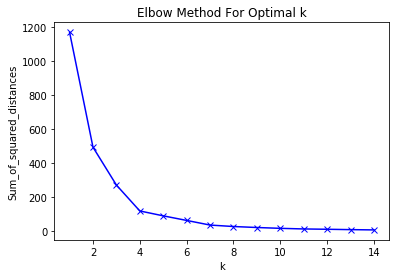

In [524]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [531]:
kmeans = KMeans(n_clusters=4).fit(data_transformed)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)
data["clusters"] = kmeans.labels_

# plt.scatter(data_transformed['x'], data_transformed['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()

[[-0.15333655 -0.07744039 -0.12474492 -0.12016486]
 [ 8.2998488   0.49998454 10.94508351 10.38791987]
 [ 6.17901037 15.7685901   1.49403938  3.51375614]
 [ 4.18444169  1.06039021  2.43361935  1.99147757]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [532]:
df6 = data.reset_index()[["Province_State", "clusters"]]
df6.sort_values(by="clusters", ascending=False)

,Province_State,clusters
77,France,3
85,Germany,3
273,United Kingdom,3
120,Iran,3
109,Hubei,3
187,New York,2
249,Spain,1
125,Italy,1
188,New Zealand,0
189,Newfoundland and Labrador,0


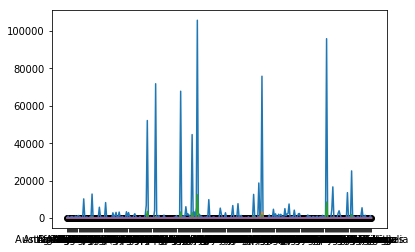

In [533]:
plt.scatter(data.reset_index().index,data['clusters'], c='black')
plt.plot(data)
plt.show()

In [534]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [535]:
X = data.iloc[:, [0, 1, 2, 3]].values
# X

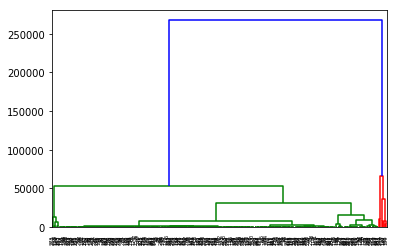

In [536]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

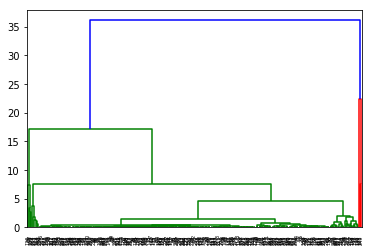

In [537]:
dendrogram = sch.dendrogram(sch.linkage(data_transformed, method='ward'))

In [539]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(data_transformed)
labels = model.labels_

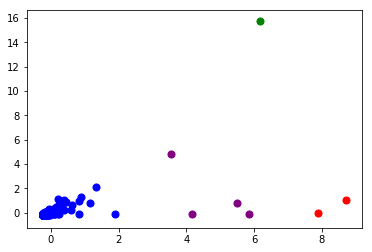

In [542]:
plt.scatter(data_transformed[labels==0, 0], data_transformed[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(data_transformed[labels==1, 0], data_transformed[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(data_transformed[labels==2, 0], data_transformed[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(data_transformed[labels==3, 0], data_transformed[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(data_transformed[labels==4, 0], data_transformed[labels==4, 1], s=50, marker='o', color='orange')
# plt.scatter(data_transformed[labels==5, 0], data_transformed[labels==5, 1], s=50, marker='o', color='black')
# plt.scatter(data_transformed[labels==6, 0], data_transformed[labels==6, 1], s=50, marker='o', color='brown')
# plt.scatter(data_transformed[labels==7, 0], data_transformed[labels==7, 1], s=50, marker='o', color='grey')
# plt.scatter(data_transformed[labels==8, 0], data_transformed[labels==8, 1], s=50, marker='o', color='pink')
# plt.scatter(data_transformed[labels==9, 0], data_transformed[labels==9, 1], s=50, marker='o', color='yellow')
plt.show()